In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import pandas as pd

import deep_fib
import utils

In [3]:
train, test = utils.data.get_train_test_split(0.01, 42)
dataset = utils.data.Marconi100Dataset(test, normalize=True)
dataset_deep_fib = deep_fib.data.DeepFIBDataset(dataset, 3)

100%|██████████| 3/3 [00:00<00:00,  4.99it/s]


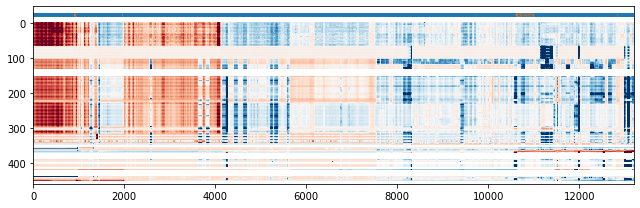

In [7]:
original, mask, (hpcsv, labels) = dataset_deep_fib[1]

utils.nn.plot_dataframe(hpcsv, pd.Series(labels.values))

In [8]:
original.shape

torch.Size([13195, 460])

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

time_len=original.shape[0]
input_dim=original.shape[1]

model = deep_fib.sci_net.SCINet(
    output_len=time_len,
    input_len=time_len,
    num_encoder_levels=2,
    num_decoder_layer=3,
    pos_enc=True,
    block_config=deep_fib.sci_net.SCIBlockCfg(
        input_dim=input_dim,
        hidden_size=16,
        groups=1,
        dilation=2,
        kernel_size=3,
        dropout=0.5,
        modified=True,
    )
).to(device)
y = model(original.unsqueeze(0))
print(y.shape)


AssertionError: evenly divided the input length into two parts. (e.g., 32 -> 16 -> 8 -> 4 for 3 levels)